# Decision Tree

The objective of this project is to implement a decision tree algorithm and train it using a prepared dataset to predict the legitimacy of online payments. To ensure the effectiveness of our implementation, we will follow a structured approach:

- *Data Preparation*: Our first step involves dividing the dataset into training and testing subsets. Additionally, we will refine the dataset to better suit the requirements of the decision tree algorithm.

- *Feature Discretization*: We will explore various discretization methods suitable for transforming continuous data into discrete categories. This process is crucial for optimizing the performance of our decision tree model.

- *Implementation of Decision Tree*: With the dataset prepared and features discretized, we will proceed to implement the decision tree algorithm. This will involve constructing the tree structure and defining the splitting criteria based on the dataset features.

- *Model Training and Evaluation*: Once the decision tree is implemented, we will train the model using the training dataset. Subsequently, we will evaluate the performance of the trained model using the testing dataset to assess its accuracy and effectiveness in predicting fraudulent online payments.

By following these steps, we aim to develop a robust decision tree model capable of accurately identifying scam transactions in online payments.

## Import Dependendies
Let's import what ever we need in this:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from collections import Counter

## Data Set Pre-Processing

In [2]:
df = pd.read_csv('Project-1/onlinefraud.csv')
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


## Lableing

In [3]:

label_type = {'PAYMENT': 0, 'TRANSFER': 1, 'CASH_OUT': 2, 'DEBIT' : 3, 'CASH_IN' : 4 }

# Label the 'type' column
df['type'] = df['type'].map(label_type)

 # Retrive only first letter of nameDest 
df.nameDest = df['nameDest'].map(lambda x: x[0])

# Define a dictionary to map 'type' values to labels
label_nameDest = {'M': 0, 'C': 1 }

# # Label the 'type' column
df['nameDest'] = df['nameDest'].map(label_nameDest)

# Remove nameOrig Column
df = df.drop('nameOrig', axis=1)

# Display the updated DataFrame
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,0,9839.64,170136.0,160296.36,0,0.00,0.00,0
1,1,0,1864.28,21249.0,19384.72,0,0.00,0.00,0
2,1,1,181.00,181.0,0.00,1,0.00,0.00,1
3,1,2,181.00,181.0,0.00,1,21182.00,0.00,1
4,1,0,11668.14,41554.0,29885.86,0,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...
99995,10,0,4020.66,159929.0,155908.34,0,0.00,0.00,0
99996,10,0,18345.49,6206.0,0.00,0,0.00,0.00,0
99997,10,4,183774.91,39173.0,222947.91,1,54925.05,0.00,0
99998,10,2,82237.17,6031.0,0.00,1,592635.66,799140.46,0


## Elbow method
The elbow method is a heuristic technique used to determine the optimal number of clusters (k) in a k-means clustering algorithm.

In [26]:
def optimizedK(data, max_k):
    means = []
    inertias = []
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize = (10, 5))
    plt.plot(means, inertias)
    plt.xlabel('name of clusters')
    plt.ylabel('inertias')
    plt.grid(True)
    plt.show


now we are going to apply k-mean on oldbalanceOrg, newbalanaceOrig, OldbalanceDest, newbalanceDest, amount.

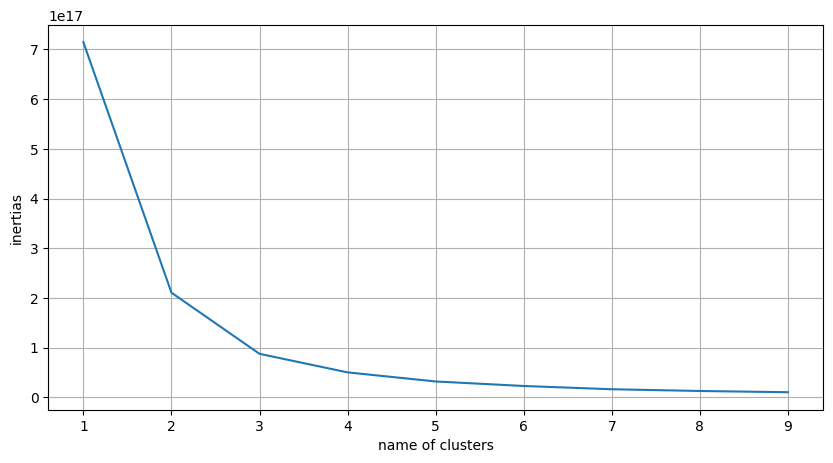

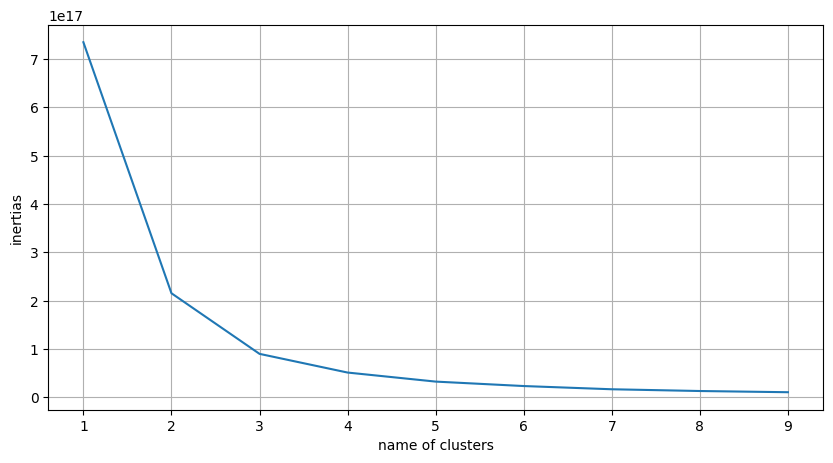

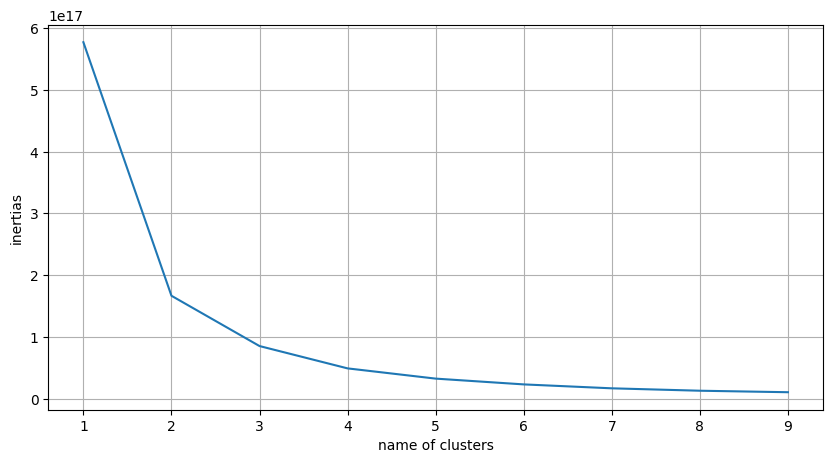

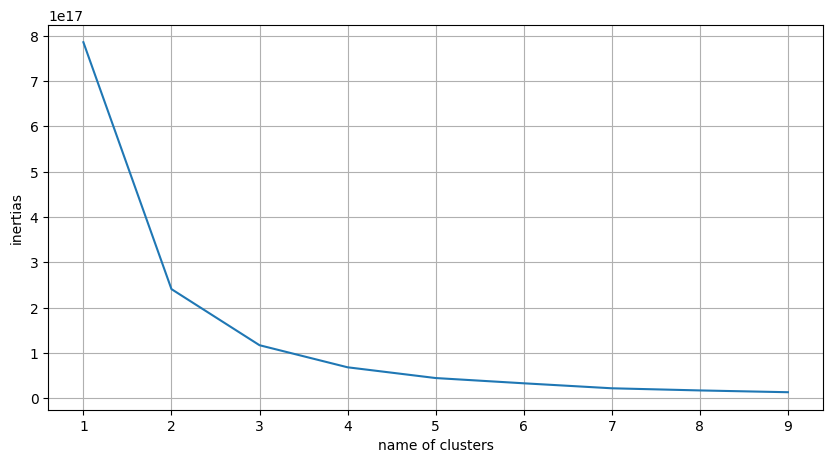

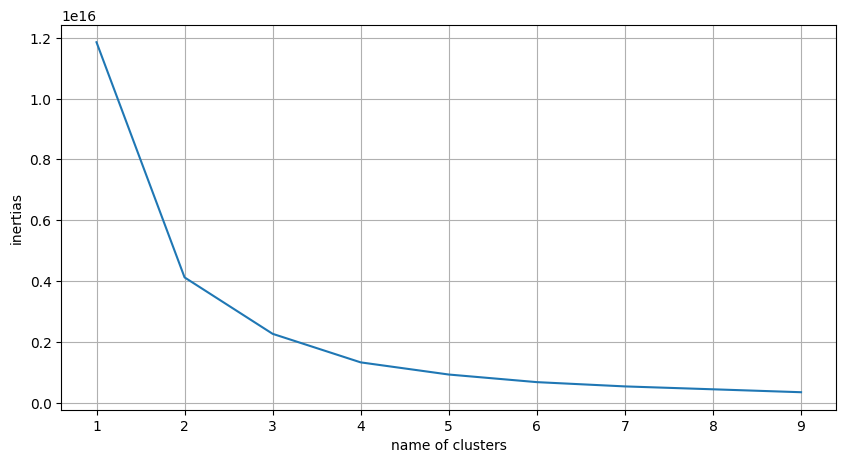

In [10]:
optimizedK(df[['oldbalanceOrg', 'isFraud']], 10)
optimizedK(df[['newbalanceOrig', 'isFraud']], 10)
optimizedK(df[['oldbalanceDest', 'isFraud']], 10)
optimizedK(df[['newbalanceDest', 'isFraud']], 10)
optimizedK(df[['amount', 'isFraud']], 10)

In [27]:
kmean = KMeans(n_clusters=4)
kmean.fit(df[['oldbalanceOrg', 'isFraud']])
df['oldbalanceOrgkm'] = kmean.labels_
kmean.fit(df[['newbalanceOrig', 'isFraud']])
df['newbalanceOrigkm'] = kmean.labels_
kmean.fit(df[['oldbalanceDest', 'isFraud']])
df['oldbalanceDestkm'] = kmean.labels_
kmean.fit(df[['newbalanceDest', 'isFraud']])
df['newbalanceDestkm'] = kmean.labels_
kmean.fit(df[['amount', 'isFraud']])
df['amountkm'] = kmean.labels_
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,oldbalanceOrgkm,newbalanceOrigkm,oldbalanceDestkm,newbalanceDestkm,amountkm
0,1,0,9839.64,170136.0,160296.36,0,0.00,0.00,0,0,0,0,0,2
1,1,0,1864.28,21249.0,19384.72,0,0.00,0.00,0,0,0,0,0,2
2,1,1,181.00,181.0,0.00,1,0.00,0.00,1,0,0,0,0,2
3,1,2,181.00,181.0,0.00,1,21182.00,0.00,1,0,0,0,0,2
4,1,0,11668.14,41554.0,29885.86,0,0.00,0.00,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10,0,4020.66,159929.0,155908.34,0,0.00,0.00,0,0,0,0,0,2
99996,10,0,18345.49,6206.0,0.00,0,0.00,0.00,0,0,0,0,0,2
99997,10,4,183774.91,39173.0,222947.91,1,54925.05,0.00,0,0,0,0,0,2
99998,10,2,82237.17,6031.0,0.00,1,592635.66,799140.46,0,0,0,0,0,2


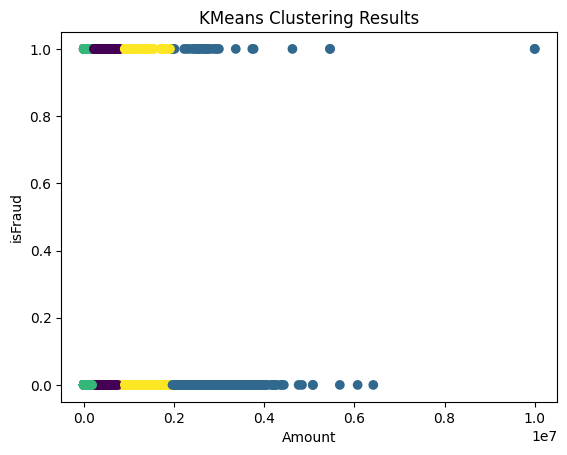

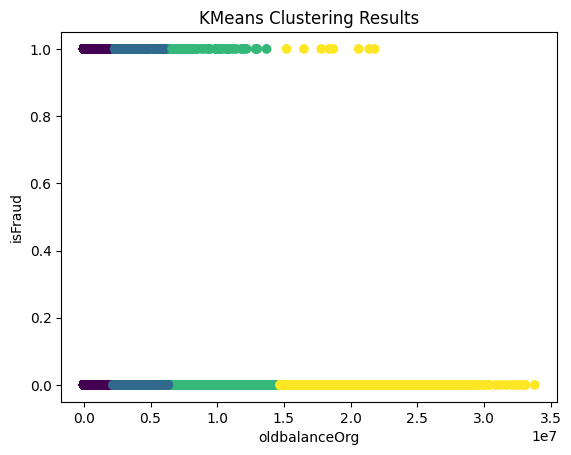

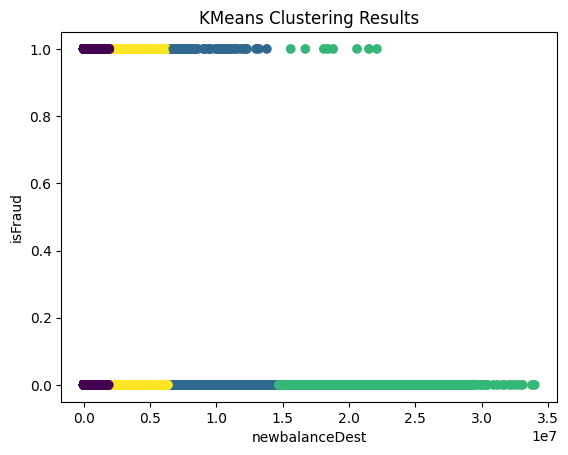

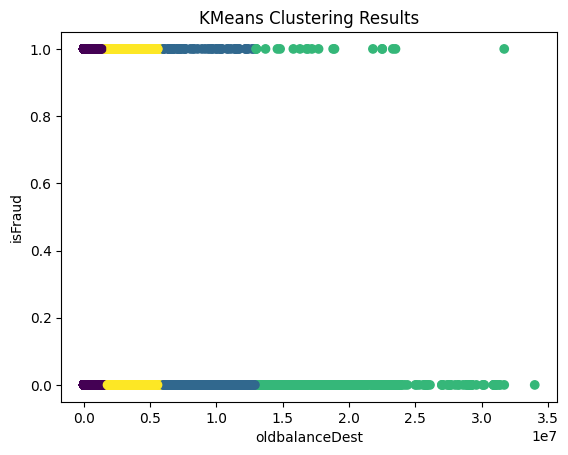

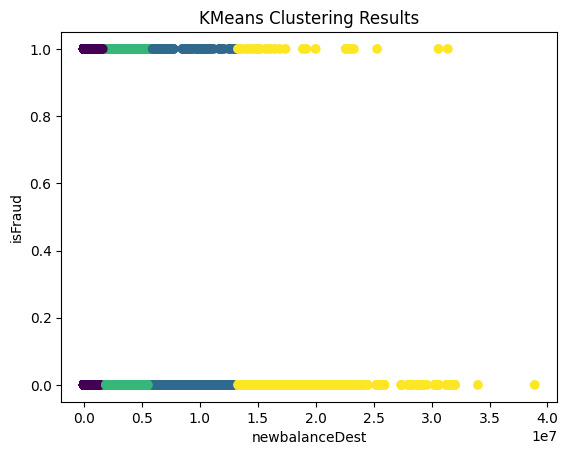

In [28]:
# Create a scatter plot to visualize the KMeans clustering results 
# Amount
plt.scatter(df['amount'], df['isFraud'], c=df['amountkm'], cmap='viridis')
plt.xlabel('Amount')
plt.ylabel('isFraud')
plt.title('KMeans Clustering Results')
plt.show()

# oldbalanceOrg
plt.scatter(df['oldbalanceOrg'], df['isFraud'], c=df['oldbalanceOrgkm'], cmap='viridis')
plt.xlabel('oldbalanceOrg')
plt.ylabel('isFraud')
plt.title('KMeans Clustering Results')
plt.show()

# newbalanceOrig
plt.scatter(df['newbalanceOrig'], df['isFraud'], c=df['newbalanceOrigkm'], cmap='viridis')
plt.xlabel('newbalanceDest')
plt.ylabel('isFraud')
plt.title('KMeans Clustering Results')
plt.show()

# oldbalanceDest
plt.scatter(df['oldbalanceDest'], df['isFraud'], c=df['oldbalanceDestkm'], cmap='viridis')
plt.xlabel('oldbalanceDest')
plt.ylabel('isFraud')
plt.title('KMeans Clustering Results')
plt.show()

#newbalanceDest
plt.scatter(df['newbalanceDest'], df['isFraud'], c=df['newbalanceDestkm'], cmap='viridis')
plt.xlabel('newbalanceDest')
plt.ylabel('isFraud')
plt.title('KMeans Clustering Results')
plt.show()

after observing the result we have to replace the extra added cells:

In [29]:
df['oldbalanceOrg'] = df.pop('oldbalanceOrgkm')
df['newbalanceOrig'] = df.pop('newbalanceOrigkm')
df['oldbalanceDest'] = df.pop('oldbalanceDestkm')
df['newbalanceDest'] = df.pop('newbalanceDestkm')
df['amount'] = df.pop('amountkm')
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,0,2,0,0,0,0,0,0
1,1,0,2,0,0,0,0,0,0
2,1,1,2,0,0,1,0,0,1
3,1,2,2,0,0,1,0,0,1
4,1,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
99995,10,0,2,0,0,0,0,0,0
99996,10,0,2,0,0,0,0,0,0
99997,10,4,2,0,0,1,0,0,0
99998,10,2,2,0,0,1,0,0,0


Let's devide the data into two parts:
- 30 for testing
- 70% for training

In [30]:
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)

As you can see the indexes are corrupted, so:

In [31]:
train_data.reset_index(drop=True, inplace=True)

## Entropy 

In the context of decision trees and classification algorithms, entropy is often used as a metric to evaluate the purity of a split. Specifically, in a decision tree, entropy is used to determine the best attribute to split the data on at each node. The goal is to find the attribute that minimizes entropy, resulting in the most homogeneous subsets of data after the split.

In [32]:
def entropy(data):
    data = np.array(data)
    unique_values, value_counts = np.unique(data, return_counts=True)        
    try:        
        probability = value_counts[1] / len(data)        
    except:
        return 0
    
    entropy_value = - probability * np.log2(probability) - (1 - probability) * np.log2(1 - probability)

    return entropy_value

## Gini-index
The Gini index measures the likelihood of incorrectly classifying a randomly chosen element if it were randomly labeled according to the distribution of labels in the subset. A lower Gini index indicates a more homogeneous subset, where all elements belong to the same class.



In [33]:
def gini(data):
    # calculate Gini index of a list
    classes, counts = np.unique(data, return_counts=True)
    probabilities = counts / len(data)
    gini_index = 1 - np.sum(probabilities ** 2)
    return gini_index

## Tree Impelementation

The implementation of the Decision Tree algorithm provides convenient methods for constructing, testing, and visualizing the tree. To begin, you can utilize the `tree()` constructor to create a new decision tree object. Once instantiated, you can build the tree using the `build_tree()` method.

After constructing the tree, you may evaluate its accuracy by employing the `validate()` method. This function assesses the performance of the decision tree using a validation dataset.

To gain insight into the structure of the decision tree and its decision-making process, you can utilize the `print_tree()` method. This method generates a visual representation of the tree, allowing for a clear understanding of its branching logic and decision nodes.

In [51]:
class Node():
    def __init__(self, feature_index=None, info_gain=None, leaf_values=None, entropy=None,gini_index = None,  value = None):
        # for decision nodes
        self.feature_index = feature_index        
        self.children = []
        self.info_gain = info_gain
        self.entropy = entropy
        self.gini_index = gini_index
        
        # for leaf nodes
        self.is_leaf = False
        self.leaf_values = leaf_values
        self.value = value
        self.majority = None

class tree():
    def __init__(self,labels,criterion='entropy',  min_samples_split=4, max_depth=5):
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

        #label of column
        self.labels = labels

        # criterion for tree construction
        self.criterion = criterion.lower()  # convert to lowercase for comparison

    def build_tree(self, data, current_depth=0, parent_feature = None, value = None):        
        
        if parent_feature:
            data.pop(parent_feature)
            
        # Determine the parent entropy and Gini index based on selected criterion
        Y = data[self.labels[-1]]
        
        if self.criterion == 'entropy':
            parent_metric = entropy(Y)
        elif self.criterion == 'gini':
            parent_metric = gini(Y)
        else:
            raise ValueError("Invalid criterion. Please choose 'entropy' or 'gini'.")
            
        # Base cases for stopping recursion
        if current_depth >= self.max_depth or len(data) < self.min_samples_split or len(set(Y)) == 1:            
            leaf_node = Node(leaf_values=Y, entropy=parent_metric, gini_index=parent_metric, value=value)
            leaf_node.majority = self.set_majority(Y)  
            leaf_node.is_leaf = True
            return leaf_node

        # Find the best feature to split on
        bestFeature, information_gain = self.best_feature(data, parent_metric)        

        # Create the decision node
        decision_node = Node(feature_index=bestFeature, info_gain=information_gain, entropy=parent_metric, gini_index=parent_metric, value=value)
        if current_depth == 0:
            self.root = decision_node
            
        # Recursively build child nodes for each unique value of the best feature
        for value in data[bestFeature].unique():            
            child_data = data[data[bestFeature] == value]
            child_node = self.build_tree(child_data, current_depth + 1, bestFeature, value=value)
            decision_node.children.append(child_node)
            decision_node.majority = self.set_majority(Y)
        
        return decision_node

    def best_feature(self, data, parent_metric):        
        X = data.iloc[:, :-1]
        features = X.columns
        Y = data.iloc[:, -1]
        best_metric = float('inf') if self.criterion == 'entropy' else float('inf')
        metric_sum = 0
        
        for feature in features:
            clusters = data[feature].unique()
            for cluster in clusters: 
                subset = data.groupby(feature).get_group(cluster)['isFraud']
                metric = entropy(subset) if self.criterion == 'entropy' else gini(subset)
                if(self.criterion == 'entropy') :
                    metric_sum += metric * len(subset) / len(data)
                else :
                    metric_sum += metric
        
            if metric_sum <= best_metric :
                best_metric = metric_sum
                best_feature = feature
        
        information_gain = parent_metric - best_metric if self.criterion == 'entropy' else best_metric
        return best_feature, round(information_gain, 6)
    
    def set_majority(self, data):
        types = data.unique()        
        majorityCount = 0
        for atype in types:
            if len(data[data == atype]) > majorityCount:
                majorityCount = len(data[data == atype])
                majority = atype
        
        return majority        
                
    def print_tree(self, node: Node, depth = 0):
        print(depth * "|      " + "|------>", end=" ")
        if node.feature_index:
            # print(depth * "|      ", end =" ")
            print(node.feature_index, node.info_gain)
            print((depth + 1) * "|      ")
        else:
            print(node.majority)
        for child in node.children:            
            self.print_tree(child, depth + 1)
            print((depth + 1) * "|      ")
        if depth == 0:
            print('End')    

    def validate(self, data):
        Y = data.iloc[:, -1]
        X = data.iloc[:, :-1]
        predicted = []        
        for i in range(len(X)):
            row = X.iloc[i, :]
            predicted_row = self.predict_one(row)                        
            predicted.append(predicted_row)
        predicted = pd.Series(predicted)        
        Y = Y.reset_index(drop=True)
        accuracy = round((Y == predicted).mean() * 100, 4)
        
            
        return accuracy
        
    def predict_one(self, row):        
        current_node = self.root
        while current_node.children:
            feature_data = row[current_node.feature_index]
            next_node = None
            for child in current_node.children:
                if child.value == feature_data:
                    next_node = child
                    break
            
            if next_node:
                current_node = next_node
            else:
                break        
            
        return current_node.majority

# Below is an example of how you can use these methods in practice:

dt = tree(train_data.columns)
root = dt.build_tree(train_data)

dt.print_tree(root)
print(f"The accuracy of the prediction is : {dt.validate(test_data)}")

|------> step 0.000215
|      
|      |------> type 7.7e-05
|      |      
|      |      |------> amount 0.0
|      |      |      
|      |      |      |------> oldbalanceOrg 0.000334
|      |      |      |      
|      |      |      |      |------> newbalanceOrig 0.0
|      |      |      |      |      
|      |      |      |      |      |------> 0
|      |      |      |      |      
|      |      |      |      
|      |      |      |      |------> newbalanceOrig 0.000134
|      |      |      |      |      
|      |      |      |      |      |------> 0
|      |      |      |      |      
|      |      |      |      |      |------> 0
|      |      |      |      |      
|      |      |      |      
|      |      |      
|      |      
|      |      |------> amount 4.7e-05
|      |      |      
|      |      |      |------> oldbalanceOrg 0.002777
|      |      |      |      
|      |      |      |      |------> newbalanceOrig 0.00059
|      |      |      |      |      
|      |      |    